<a href="https://colab.research.google.com/github/nagendrap418/data-mining/blob/main/kmeans_clustering_updated_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
import numpy as np

In [31]:
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
X    #np.random.(normal/binomial/uniform)

array([8.38167258e-01, 2.63993080e-01, 6.64526848e-01, 5.24371087e-01,
       4.07363922e-01, 7.55943887e-01, 6.31540295e-01, 8.65273067e-01,
       3.00499024e-01, 9.83855708e-01, 5.02591702e-01, 2.16815068e-01,
       3.23986217e-02, 4.97319883e-02, 4.19406580e-01, 9.12895464e-01,
       8.07290844e-01, 3.82585707e-01, 1.85468129e-01, 9.52585035e-01,
       3.19208835e-01, 1.67941611e-01, 6.42930359e-01, 2.52663301e-01,
       5.24664996e-01, 8.35096191e-02, 2.78883730e-01, 3.94622142e-02,
       7.18709067e-01, 6.08707856e-01, 5.22038377e-01, 9.47091945e-01,
       8.54288667e-01, 9.14845672e-01, 8.45422969e-01, 9.35755057e-01,
       4.06145802e-01, 1.99088222e-01, 3.60611054e-02, 7.16501754e-01,
       2.76461827e-02, 3.85543021e-01, 8.42939389e-01, 2.47159829e-01,
       5.97188918e-01, 3.70643989e-01, 5.27733278e-01, 6.70264969e-01,
       1.01154502e-01, 6.33962076e-01, 5.90230544e-01, 9.05960440e-01,
       5.32859042e-01, 2.90604686e-01, 1.55431117e-02, 2.37064197e-01,
      

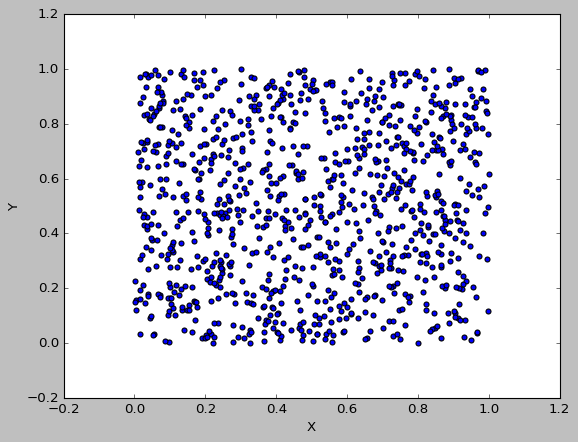

In [32]:
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy
df_xy.X = X
df_xy.Y = Y
df_xy
df_xy.plot(x="X",y = "Y",kind="scatter")
model1 = KMeans(n_clusters=5).fit(df_xy)

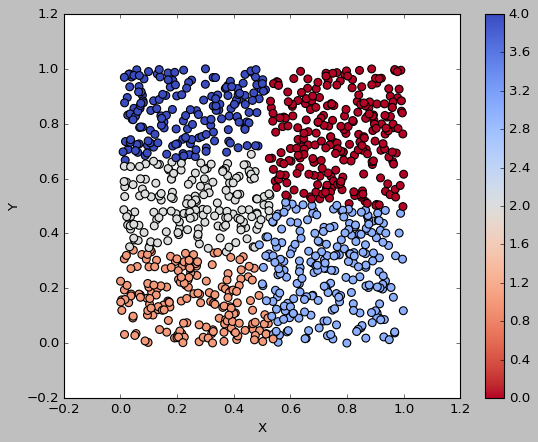

In [33]:
df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=50,cmap=plt.cm.coolwarm_r) 

In [34]:
Univ = pd.read_csv("Universities_Clustering.csv")
Univ  

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [35]:
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x)  

In [36]:
df_norm = norm_func(Univ.iloc[:,1:])  

In [37]:
df_norm.head(10)  # Top 10 rows
 

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


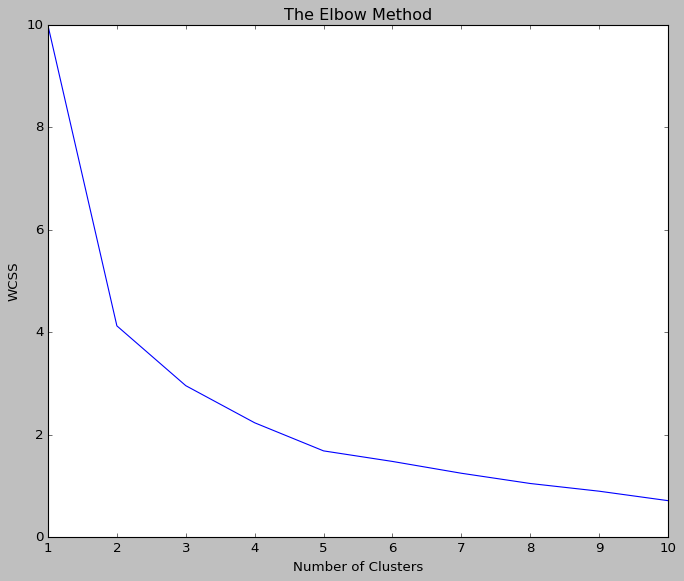

In [38]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()  

In [39]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(df_norm)  

In [42]:
y_kmeans
#clf.cluster_centers_
clf.labels_ 

array([2, 3, 4, 2, 2, 0, 0, 2, 0, 3, 0, 2, 2, 1, 0, 1, 0, 1, 4, 2, 4, 2,
       2, 1, 0], dtype=int32)

In [43]:
y_kmeans 

array([2, 3, 4, 2, 2, 0, 0, 2, 0, 3, 0, 2, 2, 1, 0, 1, 0, 1, 4, 2, 4, 2,
       2, 1, 0], dtype=int32)

In [44]:
clf.cluster_centers_ 

array([[0.87456446, 0.88095238, 0.09774436, 0.2406015 , 0.48789238,
        0.91904762],
       [0.13780488, 0.14930556, 0.73684211, 0.69736842, 0.02276248,
        0.15833333],
       [0.65718157, 0.72222222, 0.2748538 , 0.33918129, 0.28414929,
        0.78888889],
       [0.86585366, 0.82638889, 0.26973684, 0.02631579, 0.95549562,
        0.56666667],
       [0.54065041, 0.63888889, 0.54824561, 0.42105263, 0.179354  ,
        0.37777778]])

In [45]:
clf.inertia_

1.6781326840746353

In [46]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
Univ['clust']=md # creating a  new column and assigning it to new column 
Univ 

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,4
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,3


In [47]:
Univ.iloc[:,1:7].groupby(Univ.clust).mean() 

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust,,,,,,
0,1363.571429,91.428571,21.428571,10.571429,35475.142857,94.571429
1,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
2,1274.444444,80.000000,34.888889,12.444444,24295.555556,90.666667
3,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000
4,1226.666667,74.000000,55.666667,14.000000,18545.333333,78.333333


In [48]:
plt.style.use(['classic'])
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Text(0.5, 1.0, 'Clusters using KMeans')

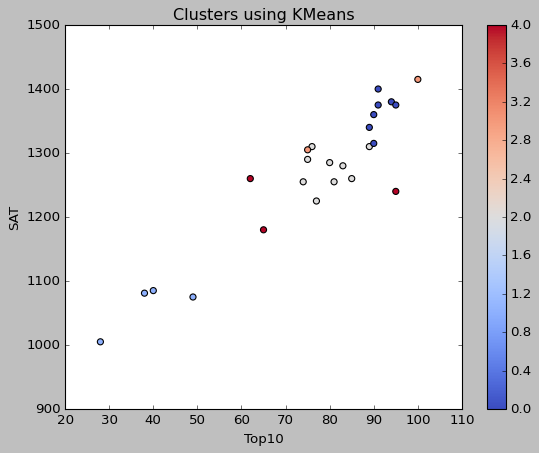

In [49]:
Univ.plot(x="Top10",y ="SAT",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')   

In [50]:
WCSS  

[9.98823519663856,
 4.12345244239718,
 2.955684328573544,
 2.2308047771916275,
 1.6819375916169372,
 1.4758031742849496,
 1.245235163011565,
 1.0450614050292577,
 0.894630218236839,
 0.7099356309961552]